# Preprocessing

## Import

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/TTKS 20203/VIB/Track 1 Datarathon/'
%cd $path
!ls

Mounted at /content/drive
/content/drive/MyDrive/TTKS 20203/VIB/Track 1 Datarathon
'0.Data VIB Hackathon Guidline.xlsx'   4.Data_Deposit.csv
 1.Data_Customer.csv		       5.Data_Lending.csv
 2.Data_MyVIB_Transaction.csv	       6.Data_Card.csv
 3.Data_MyVIB_Activity.csv	       label_times.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

sns.set()

In [ ]:
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return (df >= (Q1 - 1.5*IQR)) & (df <= (Q3 + 1.5*IQR))


## 1.Data_Customer.csv

In [ ]:
df_1 = pd.read_csv(path + '1.Data_Customer.csv')
df_1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD
0,639362,M,2019-04-23,1996-01-01 00:00:00,N,2019-04-23,BRANCH,Y,SMS
1,452440,M,2019-01-11,1999-10-10 00:00:00,N,2019-01-11,BRANCH,Y,SMART_OTP
2,326290,F,2019-05-27,1996-06-29 00:00:00,N,2019-05-27,BRANCH,Y,SMS
3,20802,M,2019-11-12,1992-08-07 00:00:00,N,2019-11-12,BRANCH,Y,SMART_OTP
4,114244,M,2019-03-29,1973-10-15 00:00:00,N,2019-03-29,BRANCH,N,SMS


In [ ]:
df_1['DATE_OF_BIRTH'] = pd.to_datetime(df_1['CLIENT_CREATE_DATE']) - pd.to_datetime(df_1['DATE_OF_BIRTH'], errors = 'coerce') + datetime.timedelta(days=1)
df_1['IB_REGISTER_DATE'] = pd.to_datetime(df_1['IB_REGISTER_DATE']) - pd.to_datetime(df_1['CLIENT_CREATE_DATE']) + datetime.timedelta(days=1)
df_1['CLIENT_CREATE_DATE'] = pd.to_datetime(df_1['CLIENT_CREATE_DATE']).max() - pd.to_datetime(df_1['CLIENT_CREATE_DATE']) + datetime.timedelta(days=1)

# Timedelta to int
cols_2 = ['CLIENT_CREATE_DATE', 'DATE_OF_BIRTH', 'IB_REGISTER_DATE']
for col in cols_2:
    df_1[col] = df_1[col].dt.days

In [ ]:
# cols = ['CLIENT_SEX', 'STAFF_VIB', 'EB_REGISTER_CHANNEL', 'SMS', 'VERIFY_METHOD']

# for col in cols:
#     df = df_1[col].str.get_dummies()
#     df.loc[df_1[col].isnull()] = 0
#     df_1[col] = df.values.tolist()

In [ ]:
cols = ['CLIENT_SEX', 'STAFF_VIB', 'EB_REGISTER_CHANNEL', 'SMS', 'VERIFY_METHOD']

for col in cols:
    df_1[col] = df_1[col].str.get_dummies().values.tolist()
    df_1[col] = np.asarray(df_1[col])

In [ ]:
df1 = df_1
df1.describe()

,CUSTOMER_NUMBER,CLIENT_CREATE_DATE,DATE_OF_BIRTH,IB_REGISTER_DATE
count,290223.000000,290223.000000,285929.000000,158975.000000
mean,500531.179138,171.318162,12646.026643,66.316968
std,288598.447604,100.419472,4270.545048,139.951582
min,0.000000,1.000000,2.000000,0.000000
25%,250704.000000,85.000000,9447.000000,1.000000
50%,501194.000000,166.000000,11784.000000,1.000000
75%,749971.000000,253.000000,14997.000000,34.000000
max,999997.000000,365.000000,43676.000000,796.000000


In [ ]:
df1.head()

,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD
0,639362,"[0, 1]",253,8514.0,"[1, 0]",1.0,"[0, 1, 0, 0]","[0, 1]","[0, 0, 1]"
1,452440,"[0, 1]",355,7034.0,"[1, 0]",1.0,"[0, 1, 0, 0]","[0, 1]","[0, 1, 0]"
2,326290,"[1, 0]",219,8368.0,"[1, 0]",1.0,"[0, 1, 0, 0]","[0, 1]","[0, 0, 1]"
3,20802,"[0, 1]",50,9959.0,"[1, 0]",1.0,"[0, 1, 0, 0]","[0, 1]","[0, 1, 0]"
4,114244,"[0, 1]",278,16602.0,"[1, 0]",1.0,"[0, 1, 0, 0]","[1, 0]","[0, 0, 1]"


### Outlier

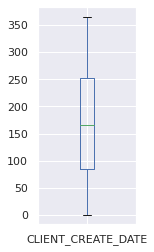

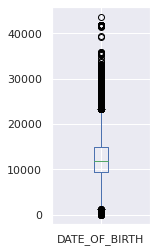

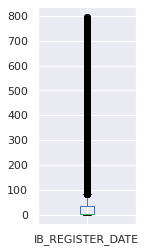

In [ ]:
plt.subplot(1,3,1)
plt.show(df1['CLIENT_CREATE_DATE'].plot(kind='box'))

plt.subplot(1,3,2)
plt.show(df1['DATE_OF_BIRTH'].plot(kind='box'))

plt.subplot(1,3,3)
plt.show(df1['IB_REGISTER_DATE'].plot(kind='box'))

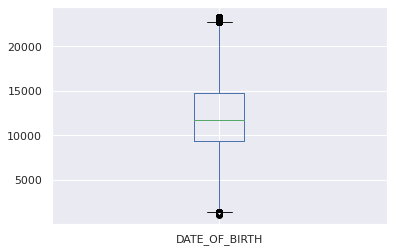

In [ ]:
dob = df1['DATE_OF_BIRTH'][outlier(df1['DATE_OF_BIRTH'])]
plt.show(dob.plot(kind='box'))

##2.Data_MyVIB_Transaction.csv

In [ ]:
df_2 = pd.read_csv(path + '2.Data_MyVIB_Transaction.csv')
df_2.head()

,TRANS_LV1,TRANS_LV2,TRANS_DATE,DAY_OF_WEEK,TRANS_HOUR,TRANS_NO,TRANS_AMOUNT,CUSTOMER_NUMBER
0,Transfer,Outside_VIB,2019-01-03,Thu,17,2,189771864.0,701619
1,Transfer,Outside_VIB,2019-07-01,Mon,13,2,30224900.0,701619
2,Transfer,Outside_VIB,2019-01-02,Wed,15,1,100000.0,701619
3,Payment,Credit_card_repayment,2019-01-03,Thu,14,1,85000000.0,262123
4,Payment,Credit_card_repayment,2019-01-28,Mon,22,1,83000000.0,262123


In [ ]:
df_2['TRANS_DATE'] = pd.to_datetime(df_2['TRANS_DATE']).max() - pd.to_datetime(df_2['TRANS_DATE']) + datetime.timedelta(days=1)
df_2['TRANS_DATE'] = df_2['TRANS_DATE'].dt.days

In [ ]:
TL1_OH = df_2[['CUSTOMER_NUMBER']].join(pd.get_dummies(df_2['TRANS_LV1'])).groupby('CUSTOMER_NUMBER').max()
TL2_OH = df_2[['CUSTOMER_NUMBER']].join(pd.get_dummies(df_2['TRANS_LV2'])).groupby('CUSTOMER_NUMBER').max()

In [ ]:
dict = {'TRANS_LV1': 'unique', 'TRANS_LV2': 'unique', 'TRANS_DATE': 'min', 'TRANS_NO': 'sum', 'TRANS_AMOUNT': 'sum'}
df2 = df_2.groupby('CUSTOMER_NUMBER', as_index=False).agg(dict)

In [ ]:
df2['TRANS_LV1'] = TL1_OH.values.tolist()
df2['TRANS_LV1'] = [np.array(i) for i in df2['TRANS_LV1']]

df2['TRANS_LV2'] = TL2_OH.values.tolist()
df2['TRANS_LV2'] = [np.array(i) for i in df2['TRANS_LV2']]

df2.head()

,CUSTOMER_NUMBER,TRANS_LV1,TRANS_LV2,TRANS_DATE,TRANS_NO,TRANS_AMOUNT
0,0,"[0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",3,11,249819000.0
1,9,"[1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]",4,6,11694976.0
2,15,"[0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",10,3,51400000.0
3,32,"[0, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]",6,40,22550050.0
4,44,"[0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]",20,3,25000000.0


In [ ]:
df2.describe()

,CUSTOMER_NUMBER,TRANS_DATE,TRANS_NO,TRANS_AMOUNT
count,52488.000000,52488.000000,52488.000000,5.248800e+04
mean,500866.791095,30.882735,32.022386,2.369459e+08
std,288933.890054,53.190143,103.684473,1.299664e+09
min,0.000000,1.000000,1.000000,1.000000e+00
25%,250524.750000,2.000000,4.000000,4.630800e+06
50%,502531.500000,9.000000,11.000000,2.146271e+07
75%,751765.250000,30.000000,33.000000,8.768225e+07
max,999982.000000,363.000000,8911.000000,5.460931e+10


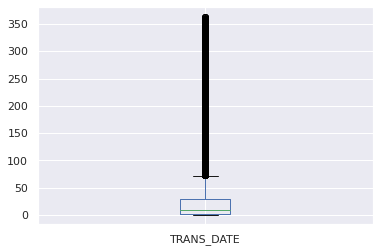

In [ ]:
plt.show(df2['TRANS_DATE'].plot(kind='box'))

##3.Data_MyVIB_Activity.csv

In [ ]:
df_3 = pd.read_csv(path + '3.Data_MyVIB_Activity.csv')
df_3.head()

,ACTIVITY_DATE,DAY_OF_WEEK,ACTIVITY_HOUR,ACTIVITY_NO,CUSTOMER_NUMBER,ACTIVITY_NAME
0,1/22/2019,Tue,20,2,630178,MB_INTEREST_RATE_VIEW
1,1/10/2019,Thu,18,16,630178,MB_INTEREST_RATE_VIEW
2,1/26/2019,Sat,17,15,630178,MB_INTEREST_RATE_VIEW
3,1/2/2019,Wed,9,27,630178,MB_INTEREST_RATE_VIEW
4,1/19/2019,Sat,8,3,630178,MB_INTEREST_RATE_VIEW


In [ ]:
df_3['ACTIVITY_DATE'] = pd.to_datetime(df_3['ACTIVITY_DATE']).max() - pd.to_datetime(df_3['ACTIVITY_DATE']) + datetime.timedelta(days=1)
df_3['ACTIVITY_DATE'] = df_3['ACTIVITY_DATE'].dt.days

In [ ]:
AN_OH = df_3[['CUSTOMER_NUMBER']].join(pd.get_dummies(df_3['ACTIVITY_NAME'])).groupby('CUSTOMER_NUMBER').max()

In [ ]:
dict = {'ACTIVITY_DATE': 'min', 'ACTIVITY_NO': 'sum', 'ACTIVITY_NAME': 'unique'}
df3 = df_3.groupby('CUSTOMER_NUMBER', as_index=False).agg(dict)

df3['ACTIVITY_NAME'] = AN_OH.values.tolist()
df3['ACTIVITY_NAME'] = [np.array(i) for i in df3['ACTIVITY_NAME']]

df3.head()

,CUSTOMER_NUMBER,ACTIVITY_DATE,ACTIVITY_NO,ACTIVITY_NAME
0,0,3,112,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
1,3,12,205,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ..."
2,9,4,619,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, ..."
3,13,116,31,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
4,15,1,99,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, ..."


In [ ]:
df3.describe()

,CUSTOMER_NUMBER,ACTIVITY_DATE,ACTIVITY_NO
count,77741.000000,77741.000000,77741.000000
mean,501498.063467,27.288368,446.855289
std,288769.736126,53.174530,764.375822
min,0.000000,1.000000,1.000000
25%,251271.000000,2.000000,80.000000
50%,502495.000000,6.000000,225.000000
75%,752513.000000,21.000000,529.000000
max,999996.000000,364.000000,31945.000000


In [ ]:
Q1 = df3['ACTIVITY_DATE'].quantile(0.25)
Q3 = df3['ACTIVITY_DATE'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR, Q1 - 1.5*IQR, Q3 + 1.5*IQR)

2.0 21.0 19.0 -26.5 49.5


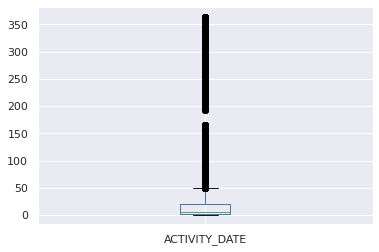

In [ ]:
plt.show(df3['ACTIVITY_DATE'].plot(kind='box'))

##4.Data_Deposit.csv

In [ ]:
df_4 = pd.read_csv(path + '4.Data_Deposit.csv')
df_4.head()

,MONTH,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,CUSTOMER_NUMBER
0,1/31/2019,1,246774.19,0,0.0,914393
1,2/28/2019,1,209207.36,0,0.0,914393
2,3/31/2019,1,213225.90,0,0.0,914393
3,4/30/2019,1,211761.87,0,0.0,914393
4,5/31/2019,1,222391.16,0,0.0,914393


In [ ]:
df_4['MONTH'] = pd.to_datetime(df_4['MONTH']).max() - pd.to_datetime(df_4['MONTH']) + datetime.timedelta(days=1)
df_4['MONTH'] = df_4['MONTH'].dt.days

In [ ]:
dict = {'MONTH': 'min', 'COUNT_CA_ACCT': 'max', 'AVG_CA_BALANCE': 'sum', 'COUNT_TD_ACCT': 'max', 'AVG_TD_BALANCE': 'sum'}
df4 = df_4.groupby('CUSTOMER_NUMBER', as_index=False).agg(dict)
df4.head()

,CUSTOMER_NUMBER,MONTH,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE
0,0,1,1,92856840.85,0,0.0
1,3,1,1,3722174.98,0,0.0
2,4,1,1,2205938.00,1,643548387.1
3,7,1,1,4392673.57,0,0.0
4,9,1,1,12951325.77,0,0.0


In [ ]:
df4.describe()

,CUSTOMER_NUMBER,MONTH,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE
count,223817.000000,223817.000000,223817.000000,2.238170e+05,223817.000000,2.238170e+05
mean,500642.972875,5.786799,0.940728,2.667731e+07,0.317152,2.788580e+08
std,288680.077364,29.422046,0.280833,3.766286e+08,0.869103,2.244955e+09
min,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,250813.000000,1.000000,1.000000,4.516521e+05,0.000000,0.000000e+00
50%,501391.000000,1.000000,1.000000,2.193759e+06,0.000000,0.000000e+00
75%,750068.000000,1.000000,1.000000,8.967932e+06,0.000000,0.000000e+00
max,999997.000000,335.000000,10.000000,1.384795e+11,37.000000,3.238710e+11


##5.Data_Lending.csv

In [ ]:
df_5 = pd.read_csv(path + '5.Data_Lending.csv')
df_5.head()

,MONTH,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,CUSTOMER_NUMBER
0,1/31/2019,1,15000000.0,811795
1,2/28/2019,1,13450000.0,811795
2,4/30/2019,1,14169673.0,811795
3,3/31/2019,1,12901665.0,811795
4,9/30/2019,1,13274815.0,811795


In [ ]:
df_5['MONTH'] = pd.to_datetime(df_5['MONTH']).max() - pd.to_datetime(df_5['MONTH']) + datetime.timedelta(days=1)
df_5['MONTH'] = df_5['MONTH'].dt.days

In [ ]:
dict = {'MONTH': 'min', 'COUNT_OF_LOAN': 'max', 'AVG_LOAN_AMOUNT': 'sum'}
df5 = df_5.groupby('CUSTOMER_NUMBER', as_index=False).agg(dict)
df5.head()

,CUSTOMER_NUMBER,MONTH,COUNT_OF_LOAN,AVG_LOAN_AMOUNT
0,7,1,1,1.638486e+09
1,8,1,1,2.118730e+08
2,9,1,1,4.624167e+09
3,14,1,1,7.417049e+07
4,16,1,2,5.962500e+09


In [ ]:
df5.describe()

,CUSTOMER_NUMBER,MONTH,COUNT_OF_LOAN,AVG_LOAN_AMOUNT
count,102014.000000,102014.000000,102014.000000,1.020140e+05
mean,500896.976807,10.597134,1.178711,2.642157e+09
std,288174.133294,36.773556,0.623226,7.179731e+09
min,7.000000,1.000000,1.000000,7.000000e+02
25%,251441.250000,1.000000,1.000000,2.115477e+08
50%,501473.500000,1.000000,1.000000,1.437510e+09
75%,750231.500000,1.000000,1.000000,3.419315e+09
max,999982.000000,335.000000,121.000000,1.291693e+12


##6.Data_Card.csv

In [ ]:
df_6 = pd.read_csv(path + '6.Data_Card.csv')
df_6.head()

,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD,CUSTOMER_NUMBER
0,9/30/2019,0,1,914326
1,4/30/2019,0,1,914326
2,11/30/2019,0,1,914326
3,8/31/2019,0,1,914326
4,12/31/2019,0,1,914326


In [ ]:
df_6['MONTH'] = pd.to_datetime(df_6['MONTH']).max() - pd.to_datetime(df_6['MONTH']) + datetime.timedelta(days=1)
df_6['MONTH'] = df_6['MONTH'].dt.days

In [ ]:
dict = {'MONTH': 'min', 'COUNT_CREDITCARD': 'max', 'COUNT_DEBITCARD': 'max'}
df6 = df_6.groupby('CUSTOMER_NUMBER', as_index=False).agg(dict)
print(df6.count())
df6.head()

CUSTOMER_NUMBER     150459
MONTH               150459
COUNT_CREDITCARD    150459
COUNT_DEBITCARD     150459
dtype: int64


,CUSTOMER_NUMBER,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD
0,0,1,0,1
1,3,1,0,1
2,8,1,1,0
3,9,1,0,1
4,13,1,0,1


In [ ]:
df_6.describe()

,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD,CUSTOMER_NUMBER
count,871589.000000,871589.000000,871589.000000,871589.000000
mean,101.829214,0.297652,0.792835,501625.555724
std,84.129823,0.506791,0.544715,288432.950598
min,1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,251821.000000
50%,93.000000,0.000000,1.000000,502600.000000
75%,154.000000,1.000000,1.000000,751193.000000
max,335.000000,13.000000,19.000000,999996.000000


In [ ]:
from functools import reduce
ada = reduce(lambda x,y: pd.merge(x,y, on='CUSTOMER_NUMBER', how='outer'), [df_5, df_6])
ada

,MONTH_x,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,CUSTOMER_NUMBER,MONTH_y,COUNT_CREDITCARD,COUNT_DEBITCARD
0,1/31/2019,1.0,15000000.0,811795,3/31/2019,1.0,0.0
1,1/31/2019,1.0,15000000.0,811795,12/31/2019,1.0,0.0
2,1/31/2019,1.0,15000000.0,811795,11/30/2019,1.0,0.0
3,1/31/2019,1.0,15000000.0,811795,9/30/2019,1.0,0.0
4,1/31/2019,1.0,15000000.0,811795,8/31/2019,1.0,0.0
...,...,...,...,...,...,...,...
2685395,NaN,NaN,NaN,789296,12/31/2019,1.0,0.0
2685396,NaN,NaN,NaN,458175,12/31/2019,0.0,1.0
2685397,NaN,NaN,NaN,738986,12/31/2019,1.0,0.0
2685398,NaN,NaN,NaN,778813,12/31/2019,0.0,1.0


In [ ]:
a = ada[ada.MONTH_x == ada.MONTH_y]
a

,MONTH_x,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,CUSTOMER_NUMBER,MONTH_y,COUNT_CREDITCARD,COUNT_DEBITCARD
10,1/31/2019,1.0,15000000.0,811795,1/31/2019,1.0,0.0
17,2/28/2019,1.0,13450000.0,811795,2/28/2019,1.0,0.0
35,4/30/2019,1.0,14169673.0,811795,4/30/2019,1.0,0.0
36,3/31/2019,1.0,12901665.0,811795,3/31/2019,1.0,0.0
51,9/30/2019,1.0,13274815.0,811795,9/30/2019,1.0,0.0
...,...,...,...,...,...,...,...
2075836,12/31/2019,1.0,13171000.0,524036,12/31/2019,1.0,0.0
2075837,12/31/2019,1.0,2290000.0,852150,12/31/2019,1.0,0.0
2075838,12/31/2019,1.0,50235750.0,568197,12/31/2019,1.0,0.0
2075842,12/31/2019,1.0,1129695.0,485455,12/31/2019,1.0,0.0


In [ ]:
b = a[(a.COUNT_OF_LOAN - a.COUNT_CREDITCARD != 0)]
b

,MONTH_x,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,CUSTOMER_NUMBER,MONTH_y,COUNT_CREDITCARD,COUNT_DEBITCARD
350,10/31/2019,1.0,15307174.0,947399,10/31/2019,2.0,0.0
369,11/30/2019,1.0,8711074.0,947399,11/30/2019,2.0,0.0
447,12/31/2019,1.0,56051074.0,947399,12/31/2019,2.0,0.0
1590,12/31/2019,2.0,214486034.0,976823,12/31/2019,1.0,1.0
2343,11/30/2019,2.0,520533665.0,972641,11/30/2019,1.0,0.0
...,...,...,...,...,...,...,...
2075661,12/31/2019,1.0,11500000.0,642032,12/31/2019,2.0,0.0
2075664,12/31/2019,1.0,28900788.0,575366,12/31/2019,2.0,0.0
2075691,12/31/2019,1.0,14490600.0,120897,12/31/2019,2.0,0.0
2075734,12/31/2019,1.0,3463132.0,415915,12/31/2019,2.0,0.0


In [ ]:
b['CUSTOMER_NUMBER'].value_counts()

773937    12
754418    12
439361    12
65171     12
757       12
          ..
320534     1
707603     1
610802     1
733694     1
625875     1
Name: CUSTOMER_NUMBER, Length: 16035, dtype: int64

In [ ]:
c=b[b['CUSTOMER_NUMBER'] == 773937]
c.sort_values(by="MONTH_x", key=pd.to_datetime)

,MONTH_x,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,CUSTOMER_NUMBER,MONTH_y,COUNT_CREDITCARD,COUNT_DEBITCARD
1401173,1/31/2019,2.0,1.500000e+09,773937,1/31/2019,1.0,0.0
1401228,2/28/2019,2.0,1.491875e+09,773937,2/28/2019,1.0,0.0
1401190,3/31/2019,2.0,1.483750e+09,773937,3/31/2019,1.0,0.0
1401158,4/30/2019,4.0,1.682175e+09,773937,4/30/2019,1.0,0.0
1401136,5/31/2019,4.0,1.683991e+09,773937,5/31/2019,1.0,0.0
1401102,6/30/2019,4.0,1.673237e+09,773937,6/30/2019,1.0,0.0
1401227,7/31/2019,4.0,1.662731e+09,773937,7/31/2019,1.0,0.0
1401153,8/31/2019,3.0,2.665000e+09,773937,8/31/2019,1.0,0.0
1401193,9/30/2019,3.0,2.650000e+09,773937,9/30/2019,1.0,0.0
1401212,10/31/2019,4.0,2.642909e+09,773937,10/31/2019,1.0,0.0


## Concating All Data

In [ ]:
from functools import reduce

In [ ]:
all_data = reduce(lambda x,y: pd.merge(x,y, on='CUSTOMER_NUMBER', how='outer'), [df1, df2, df3, df4, df5, df6])

In [ ]:
all_data.sort_values('CUSTOMER_NUMBER')

,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,TRANS_LV1,TRANS_LV2,TRANS_DATE,TRANS_NO,TRANS_AMOUNT,ACTIVITY_DATE,ACTIVITY_NO,ACTIVITY_NAME,MONTH_x,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,MONTH_y,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD
56746,0,"[1, 0]",107,11301.0,"[1, 0]",2.0,"[0, 1, 0, 0]","[1, 0]","[0, 1, 0]","[0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",3.0,11.0,249819000.0,3.0,112.0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",1.0,1.0,92856840.85,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0
74724,3,"[0, 1]",260,11568.0,"[1, 0]",51.0,"[0, 0, 1, 0]","[0, 1]","[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,12.0,205.0,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ...",1.0,1.0,3722174.98,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0
248002,4,"[0, 1]",131,20350.0,"[1, 0]",NaN,"[0, 0, 0, 0]","[0, 0]","[0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2205938.00,1.0,643548387.1,NaN,NaN,NaN,NaN,NaN,NaN
216884,7,"[0, 0]",174,NaN,"[1, 0]",NaN,"[0, 0, 0, 0]","[0, 0]","[0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4392673.57,0.0,0.0,1.0,1.0,1.638486e+09,NaN,NaN,NaN
258286,8,"[0, 1]",235,14233.0,"[1, 0]",NaN,"[0, 0, 0, 0]","[0, 0]","[0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.118730e+08,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119568,999977,"[0, 1]",191,10400.0,"[1, 0]",337.0,"[0, 1, 0, 0]","[0, 1]","[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,11382302.14,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0
102172,999982,"[0, 1]",163,9462.0,"[1, 0]",5.0,"[1, 0, 0, 0]","[1, 0]","[0, 1, 0]","[1, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",7.0,22.0,16325000.0,6.0,1999.0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, ...",1.0,1.0,474193.55,0.0,0.0,1.0,1.0,2.351376e+08,1.0,1.0,0.0
250367,999993,"[1, 0]",92,8300.0,"[1, 0]",NaN,"[0, 0, 0, 0]","[0, 0]","[0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,407301.07,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0
79131,999996,"[0, 1]",91,22912.0,"[1, 0]",1.0,"[0, 1, 0, 0]","[0, 1]","[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,1.0,35.0,"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",1.0,1.0,64413149.41,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0


In [ ]:
all_data.describe()

,CUSTOMER_NUMBER,CLIENT_CREATE_DATE,DATE_OF_BIRTH,IB_REGISTER_DATE,TRANS_DATE,TRANS_NO,TRANS_AMOUNT,ACTIVITY_DATE,ACTIVITY_NO,MONTH_x,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,MONTH_y,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD
count,290223.000000,290223.000000,285929.000000,158975.000000,52488.000000,52488.000000,5.248800e+04,77741.000000,77741.000000,223817.000000,223817.000000,2.238170e+05,223817.000000,2.238170e+05,102014.000000,102014.000000,1.020140e+05,150459.0,150459.000000,150459.000000
mean,500531.179138,171.318162,12646.026643,66.316968,30.882735,32.022386,2.369459e+08,27.288368,446.855289,5.786799,0.940728,2.667731e+07,0.317152,2.788580e+08,10.597134,1.178711,2.642157e+09,1.0,0.307964,0.812328
std,288598.447604,100.419472,4270.545048,139.951582,53.190143,103.684473,1.299664e+09,53.174530,764.375822,29.422046,0.280833,3.766286e+08,0.869103,2.244955e+09,36.773556,0.623226,7.179731e+09,0.0,0.523111,0.575996
min,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,1.000000,7.000000e+02,1.0,0.000000,0.000000
25%,250704.000000,85.000000,9447.000000,1.000000,2.000000,4.000000,4.630800e+06,2.000000,80.000000,1.000000,1.000000,4.516521e+05,0.000000,0.000000e+00,1.000000,1.000000,2.115477e+08,1.0,0.000000,0.000000
50%,501194.000000,166.000000,11784.000000,1.000000,9.000000,11.000000,2.146271e+07,6.000000,225.000000,1.000000,1.000000,2.193759e+06,0.000000,0.000000e+00,1.000000,1.000000,1.437510e+09,1.0,0.000000,1.000000
75%,749971.000000,253.000000,14997.000000,34.000000,30.000000,33.000000,8.768225e+07,21.000000,529.000000,1.000000,1.000000,8.967932e+06,0.000000,0.000000e+00,1.000000,1.000000,3.419315e+09,1.0,1.000000,1.000000
max,999997.000000,365.000000,43676.000000,796.000000,363.000000,8911.000000,5.460931e+10,364.000000,31945.000000,335.000000,10.000000,1.384795e+11,37.000000,3.238710e+11,335.000000,121.000000,1.291693e+12,1.0,13.000000,19.000000


# Feature 

In [ ]:
feature = all_data
feature.sort_values('CUSTOMER_NUMBER').head()

,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,TRANS_LV1,TRANS_LV2,TRANS_DATE,TRANS_NO,TRANS_AMOUNT,ACTIVITY_DATE,ACTIVITY_NO,ACTIVITY_NAME,MONTH_x,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,MONTH_y,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD
56746,0,"[1, 0]",107,11301.0,"[1, 0]",2.0,"[0, 1, 0, 0]","[1, 0]","[0, 1, 0]","[0, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",3.0,11.0,249819000.0,3.0,112.0,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",1.0,1.0,92856840.85,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0
74724,3,"[0, 1]",260,11568.0,"[1, 0]",51.0,"[0, 0, 1, 0]","[0, 1]","[0, 1, 0]",NaN,NaN,NaN,NaN,NaN,12.0,205.0,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ...",1.0,1.0,3722174.98,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0
248002,4,"[0, 1]",131,20350.0,"[1, 0]",NaN,"[0, 0, 0, 0]","[0, 0]","[0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2205938.00,1.0,643548387.1,NaN,NaN,NaN,NaN,NaN,NaN
216884,7,"[0, 0]",174,NaN,"[1, 0]",NaN,"[0, 0, 0, 0]","[0, 0]","[0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4392673.57,0.0,0.0,1.0,1.0,1.638486e+09,NaN,NaN,NaN
258286,8,"[0, 1]",235,14233.0,"[1, 0]",NaN,"[0, 0, 0, 0]","[0, 0]","[0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.118730e+08,1.0,1.0,0.0


In [ ]:
test = feature.dropna()
cols = ['CLIENT_SEX', 'STAFF_VIB', 'EB_REGISTER_CHANNEL', 'SMS', 'VERIFY_METHOD', 'TRANS_LV1', 'TRANS_LV2', 'ACTIVITY_NAME']
for col in cols:
    l = len(test[col].iloc[0])
    col_name = [col+'_'+str(i) for i in range(l)]
    a = pd.DataFrame(test[col].to_list(), columns=col_name, index=test.index)
    test = test.join(a)
    test.drop(col, axis=1, inplace=True)
test.drop('CUSTOMER_NUMBER', axis=1, inplace=True)
test.head()

,CLIENT_CREATE_DATE,DATE_OF_BIRTH,IB_REGISTER_DATE,TRANS_DATE,TRANS_NO,TRANS_AMOUNT,ACTIVITY_DATE,ACTIVITY_NO,MONTH_x,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,MONTH_y,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD,CLIENT_SEX_0,CLIENT_SEX_1,STAFF_VIB_0,STAFF_VIB_1,EB_REGISTER_CHANNEL_0,EB_REGISTER_CHANNEL_1,EB_REGISTER_CHANNEL_2,EB_REGISTER_CHANNEL_3,SMS_0,SMS_1,VERIFY_METHOD_0,VERIFY_METHOD_1,VERIFY_METHOD_2,TRANS_LV1_0,TRANS_LV1_1,TRANS_LV1_2,TRANS_LV2_0,TRANS_LV2_1,TRANS_LV2_2,TRANS_LV2_3,TRANS_LV2_4,...,ACTIVITY_NAME_5,ACTIVITY_NAME_6,ACTIVITY_NAME_7,ACTIVITY_NAME_8,ACTIVITY_NAME_9,ACTIVITY_NAME_10,ACTIVITY_NAME_11,ACTIVITY_NAME_12,ACTIVITY_NAME_13,ACTIVITY_NAME_14,ACTIVITY_NAME_15,ACTIVITY_NAME_16,ACTIVITY_NAME_17,ACTIVITY_NAME_18,ACTIVITY_NAME_19,ACTIVITY_NAME_20,ACTIVITY_NAME_21,ACTIVITY_NAME_22,ACTIVITY_NAME_23,ACTIVITY_NAME_24,ACTIVITY_NAME_25,ACTIVITY_NAME_26,ACTIVITY_NAME_27,ACTIVITY_NAME_28,ACTIVITY_NAME_29,ACTIVITY_NAME_30,ACTIVITY_NAME_31,ACTIVITY_NAME_32,ACTIVITY_NAME_33,ACTIVITY_NAME_34,ACTIVITY_NAME_35,ACTIVITY_NAME_36,ACTIVITY_NAME_37,ACTIVITY_NAME_38,ACTIVITY_NAME_39,ACTIVITY_NAME_40,ACTIVITY_NAME_41,ACTIVITY_NAME_42,ACTIVITY_NAME_43,ACTIVITY_NAME_44
20,299,13299.0,27.0,7.0,11.0,161473844.0,2.0,1131.0,1.0,1.0,9582972.28,0.0,0.0,1.0,2.0,1.769609e+10,1.0,1.0,0.0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
23,84,10578.0,1.0,9.0,3.0,2500000.0,1.0,343.0,1.0,1.0,1288469.77,0.0,0.0,1.0,1.0,3.650000e+07,1.0,1.0,1.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27,49,11302.0,10.0,7.0,7.0,89975892.0,5.0,175.0,1.0,1.0,27665314.72,0.0,0.0,1.0,2.0,2.340725e+08,1.0,1.0,0.0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
34,77,10256.0,3.0,1.0,44.0,533618700.0,1.0,642.0,1.0,1.0,45963999.89,0.0,0.0,1.0,1.0,1.939725e+07,1.0,2.0,1.0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
57,106,8922.0,1.0,1.0,60.0,85260100.0,1.0,1345.0,1.0,1.0,18072558.78,0.0,0.0,1.0,1.0,4.656653e+06,1.0,1.0,1.0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,...,0,1,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [ ]:
print(test.columns.get_loc("CLIENT_SEX_0"))
test.iloc[:,0:19]

19


,CLIENT_CREATE_DATE,DATE_OF_BIRTH,IB_REGISTER_DATE,TRANS_DATE,TRANS_NO,TRANS_AMOUNT,ACTIVITY_DATE,ACTIVITY_NO,MONTH_x,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,MONTH_y,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD
20,299,13299.0,27.0,7.0,11.0,161473844.0,2.0,1131.0,1.0,1.0,9582972.28,0.0,0.000000e+00,1.0,2.0,1.769609e+10,1.0,1.0,0.0
23,84,10578.0,1.0,9.0,3.0,2500000.0,1.0,343.0,1.0,1.0,1288469.77,0.0,0.000000e+00,1.0,1.0,3.650000e+07,1.0,1.0,1.0
27,49,11302.0,10.0,7.0,7.0,89975892.0,5.0,175.0,1.0,1.0,27665314.72,0.0,0.000000e+00,1.0,2.0,2.340725e+08,1.0,1.0,0.0
34,77,10256.0,3.0,1.0,44.0,533618700.0,1.0,642.0,1.0,1.0,45963999.89,0.0,0.000000e+00,1.0,1.0,1.939725e+07,1.0,2.0,1.0
57,106,8922.0,1.0,1.0,60.0,85260100.0,1.0,1345.0,1.0,1.0,18072558.78,0.0,0.000000e+00,1.0,1.0,4.656653e+06,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158910,98,13943.0,1.0,23.0,2.0,9147759.0,1.0,48.0,1.0,1.0,1696329.06,0.0,0.000000e+00,1.0,2.0,2.122769e+09,1.0,1.0,0.0
158912,287,10728.0,1.0,5.0,43.0,365630778.0,1.0,787.0,32.0,1.0,33054734.53,0.0,0.000000e+00,1.0,1.0,2.949600e+08,1.0,1.0,1.0
158929,156,12825.0,3.0,6.0,7.0,11278223.0,6.0,681.0,1.0,1.0,579931.24,0.0,0.000000e+00,1.0,1.0,1.048667e+08,1.0,1.0,0.0
158954,77,21839.0,50.0,5.0,1.0,100000.0,2.0,207.0,1.0,1.0,16030825.52,3.0,4.733871e+09,1.0,1.0,2.325525e+06,1.0,1.0,0.0


## Test K-Means

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.figure(figsize=(10,10))

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 1, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 1, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 1, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

### Not standard scaler

Text(0, 0.5, 'silhouette score')

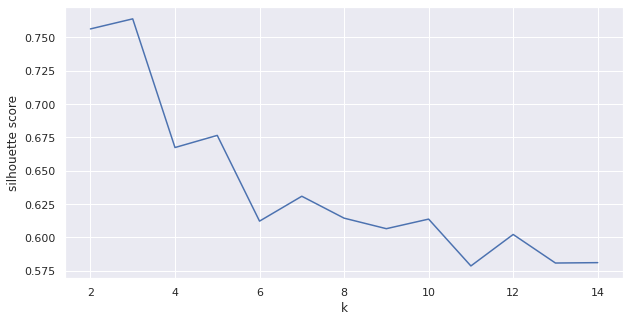

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

H = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(test)
    H.append([k, silhouette_score(test, kmeans.labels_)])

plt.figure(figsize=(10, 5))
plt.plot(pd.DataFrame(H)[0], pd.DataFrame(H)[1])
plt.xlabel('k')
plt.ylabel('silhouette score')

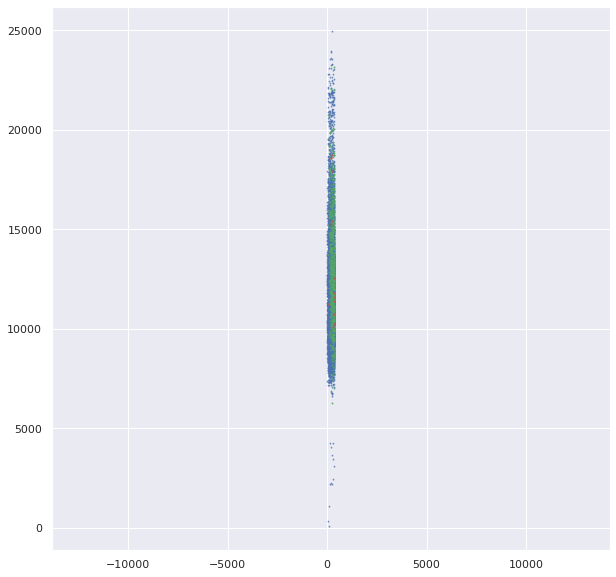

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(test)

pred_label = kmeans.predict(test)
kmeans_display(test.values, pred_label)

### Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# standard_scaler = standard_scaler.fit_transform(test)
test.iloc[:,0:19] = standard_scaler.fit_transform(test.iloc[:,0:19])

test

,CLIENT_CREATE_DATE,DATE_OF_BIRTH,IB_REGISTER_DATE,TRANS_DATE,TRANS_NO,TRANS_AMOUNT,ACTIVITY_DATE,ACTIVITY_NO,MONTH_x,COUNT_CA_ACCT,AVG_CA_BALANCE,COUNT_TD_ACCT,AVG_TD_BALANCE,MONTH_y,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD,CLIENT_SEX_0,CLIENT_SEX_1,STAFF_VIB_0,STAFF_VIB_1,EB_REGISTER_CHANNEL_0,EB_REGISTER_CHANNEL_1,EB_REGISTER_CHANNEL_2,EB_REGISTER_CHANNEL_3,SMS_0,SMS_1,VERIFY_METHOD_0,VERIFY_METHOD_1,VERIFY_METHOD_2,TRANS_LV1_0,TRANS_LV1_1,TRANS_LV1_2,TRANS_LV2_0,TRANS_LV2_1,TRANS_LV2_2,TRANS_LV2_3,TRANS_LV2_4,...,ACTIVITY_NAME_5,ACTIVITY_NAME_6,ACTIVITY_NAME_7,ACTIVITY_NAME_8,ACTIVITY_NAME_9,ACTIVITY_NAME_10,ACTIVITY_NAME_11,ACTIVITY_NAME_12,ACTIVITY_NAME_13,ACTIVITY_NAME_14,ACTIVITY_NAME_15,ACTIVITY_NAME_16,ACTIVITY_NAME_17,ACTIVITY_NAME_18,ACTIVITY_NAME_19,ACTIVITY_NAME_20,ACTIVITY_NAME_21,ACTIVITY_NAME_22,ACTIVITY_NAME_23,ACTIVITY_NAME_24,ACTIVITY_NAME_25,ACTIVITY_NAME_26,ACTIVITY_NAME_27,ACTIVITY_NAME_28,ACTIVITY_NAME_29,ACTIVITY_NAME_30,ACTIVITY_NAME_31,ACTIVITY_NAME_32,ACTIVITY_NAME_33,ACTIVITY_NAME_34,ACTIVITY_NAME_35,ACTIVITY_NAME_36,ACTIVITY_NAME_37,ACTIVITY_NAME_38,ACTIVITY_NAME_39,ACTIVITY_NAME_40,ACTIVITY_NAME_41,ACTIVITY_NAME_42,ACTIVITY_NAME_43,ACTIVITY_NAME_44
20,0.978977,0.493291,0.020373,-0.425383,-0.332293,-0.133328,-0.337091,0.356694,-0.065045,-0.11729,-0.182725,-0.346203,-0.125783,-0.255456,0.759649,2.968513,0.0,0.155115,-0.876915,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
23,-1.368762,-0.508559,-0.446732,-0.382568,-0.467698,-0.262430,-0.376245,-0.445636,-0.065045,-0.11729,-0.202394,-0.346203,-0.125783,-0.255456,-0.668260,-0.517531,0.0,0.155115,0.725085,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
27,-1.750952,-0.241988,-0.285042,-0.425383,-0.399995,-0.191391,-0.219627,-0.616691,-0.065045,-0.11729,-0.139844,-0.346203,-0.125783,-0.255456,0.759649,-0.478529,0.0,0.155115,-0.876915,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
34,-1.445200,-0.627117,-0.410801,-0.553830,0.226252,0.168887,-0.376245,-0.141199,-0.065045,-0.11729,-0.096451,-0.346203,-0.125783,-0.255456,-0.668260,-0.520907,0.0,1.958496,0.725085,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
57,-1.128528,-1.118285,-0.446732,-0.553830,0.497062,-0.195221,-0.376245,0.574586,-0.065045,-0.11729,-0.162593,-0.346203,-0.125783,-0.255456,-0.668260,-0.523817,0.0,0.155115,0.725085,1,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,...,0,1,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158910,-1.215886,0.730406,-0.446732,-0.082861,-0.484623,-0.257031,-0.376245,-0.746001,-0.065045,-0.11729,-0.201427,-0.346203,-0.125783,-0.255456,0.759649,-0.105696,0.0,0.155115,-0.876915,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158912,0.847940,-0.453330,-0.446732,-0.468199,0.209327,0.032466,-0.376245,0.006438,4.775044,-0.11729,-0.127064,-0.346203,-0.125783,-0.255456,-0.668260,-0.466510,0.0,0.155115,0.725085,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,...,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
158929,-0.582543,0.318768,-0.410801,-0.446791,-0.399995,-0.255301,-0.180473,-0.101489,-0.065045,-0.11729,-0.204075,-0.346203,-0.125783,-0.255456,-0.668260,-0.504035,0.0,0.155115,-0.876915,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0

Text(0, 0.5, 'silhouette score')

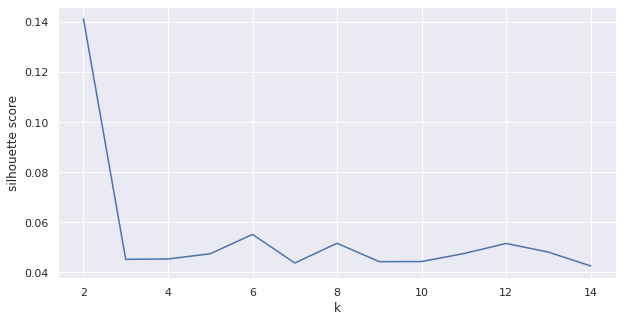

In [ ]:
H = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(standard_test)
    H.append([k, silhouette_score(standard_test, kmeans.labels_)])

plt.figure(figsize=(10, 5))
plt.plot(pd.DataFrame(H)[0], pd.DataFrame(H)[1])
plt.xlabel('k')
plt.ylabel('silhouette score')

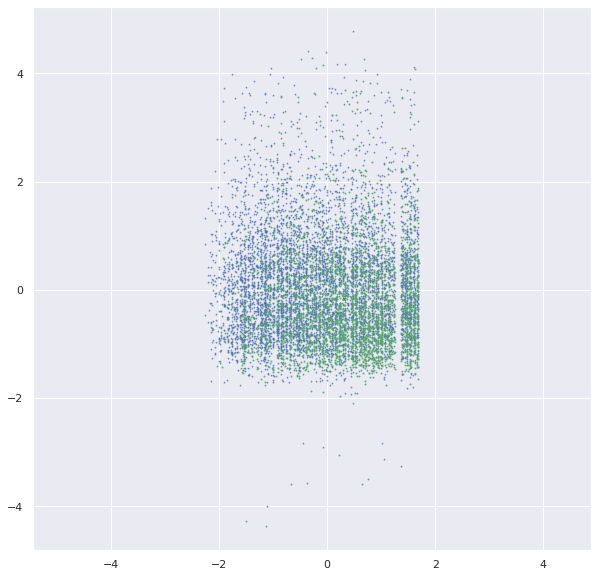

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(standard_test)

pred_label = kmeans.predict(standard_test)
kmeans_display(test.values, pred_label)